In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from fbprophet import Prophet
from matplotlib import pyplot
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

In [102]:
celtics = pd.read_csv('combined.csv', parse_dates=True)
df = celtics[['Date','Long Mid']]
clean = df.rename(columns={"Date": "ds", "Long Mid": "y"})
clean['ds']= pd.to_datetime(clean['ds'])


In [10]:
m = Prophet()
m.fit(clean)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


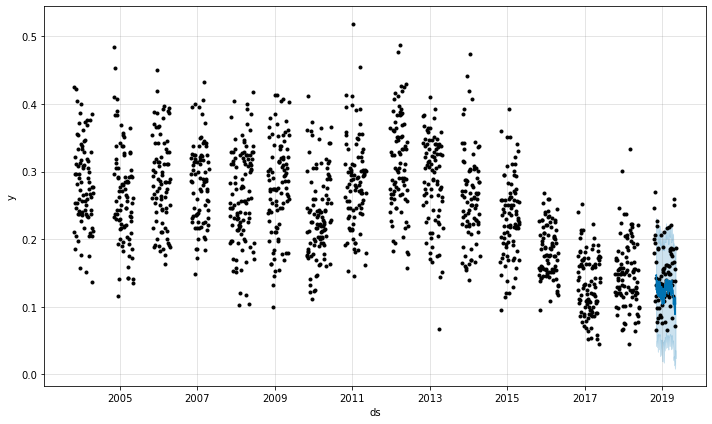

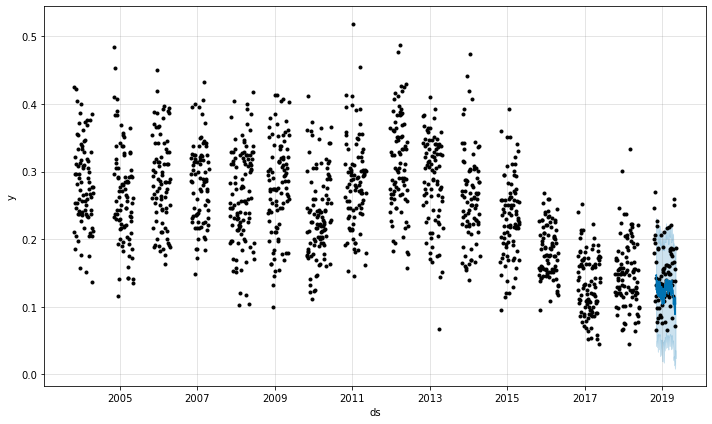

In [11]:
# Load test dates
future = pd.read_csv('Predict.csv', parse_dates=True)
future['ds']= pd.to_datetime(future['ds'])
forecast = m.predict(future)
m.plot(forecast)


In [12]:
train = clean.drop(df.index[-82:])
train

,ds,y
0,2003-10-29,0.425
1,2003-10-31,0.211
2,2003-11-01,0.321
3,2003-11-05,0.297
4,2003-11-07,0.185
...,...,...
1373,2018-10-25,0.207
1374,2018-10-27,0.195
1375,2018-10-30,0.270
1376,2018-11-01,0.143


In [13]:
y_true = clean['y'][-82:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 0.036


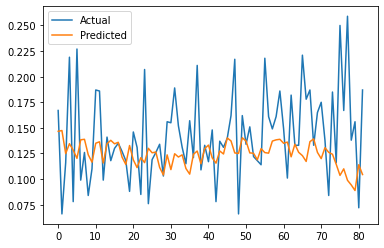

In [14]:
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [96]:

X = clean[['ds']]
y = clean['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234)
train = pd.concat([X_train, y_train], axis=1)

AttributeError: 'DataFrame' object has no attribute 'datetime'

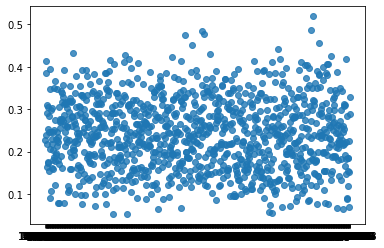

In [77]:
lr = LinearRegression()

In [95]:
lr.fit(X_train, y_train)

X_test


,ds
605,2010-03-10
642,2010-06-03
993,2014-04-14
736,2011-05-03
1239,2017-03-20
...,...
277,2006-12-13
868,2013-01-25
1262,2017-05-15
290,2007-01-10


In [91]:
# y_pred = lr.predict(X_test)
X_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 605 to 1144
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 5.7 KB
